In [1]:
import tushare as ts
ts.set_token('0d143d9b7bb47143e958e7d5b069c5e25cfd20ae847c0960dfdf28b1')
pro = ts.pro_api()

In [80]:
df = pro.daily(ts_code='000001.SZ', start_date='20141101', end_date='20191130')

In [81]:
df.sort_values(by='trade_date',ascending=True,inplace=True)

In [82]:
df.count()

ts_code       1240
trade_date    1240
open          1240
high          1240
low           1240
close         1240
pre_close     1240
change        1240
pct_chg       1240
vol           1240
amount        1240
dtype: int64

In [116]:
df2=df[df['trade_date']>='20170101']

In [117]:
df2.sort_values(by='trade_date',ascending=True,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
df2.head(15)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
708,000001.SZ,20170103,9.11,9.18,9.09,9.16,9.10,0.06,0.66,459840.49,420595.176
707,000001.SZ,20170104,9.15,9.18,9.14,9.16,9.16,0.00,0.00,449329.53,411503.444
706,000001.SZ,20170105,9.17,9.18,9.15,9.17,9.16,0.01,0.11,344372.91,315769.693
705,000001.SZ,20170106,9.17,9.17,9.11,9.13,9.17,-0.04,-0.44,358154.20,327176.433
704,000001.SZ,20170109,9.13,9.17,9.11,9.15,9.13,0.02,0.22,361081.57,329994.604
703,000001.SZ,20170110,9.15,9.16,9.14,9.15,9.15,0.00,0.00,241053.95,220575.131
702,000001.SZ,20170111,9.14,9.17,9.13,9.14,9.15,-0.01,-0.11,303430.89,277553.207
701,000001.SZ,20170112,9.13,9.17,9.13,9.15,9.14,0.01,0.11,428006.77,391869.402
700,000001.SZ,20170113,9.14,9.19,9.12,9.16,9.15,0.01,0.11,434301.37,397601.906
699,000001.SZ,20170116,9.15,9.16,9.07,9.14,9.16,-0.02,-0.22,683165.86,623025.820


In [16]:
df2['open'].count()

222

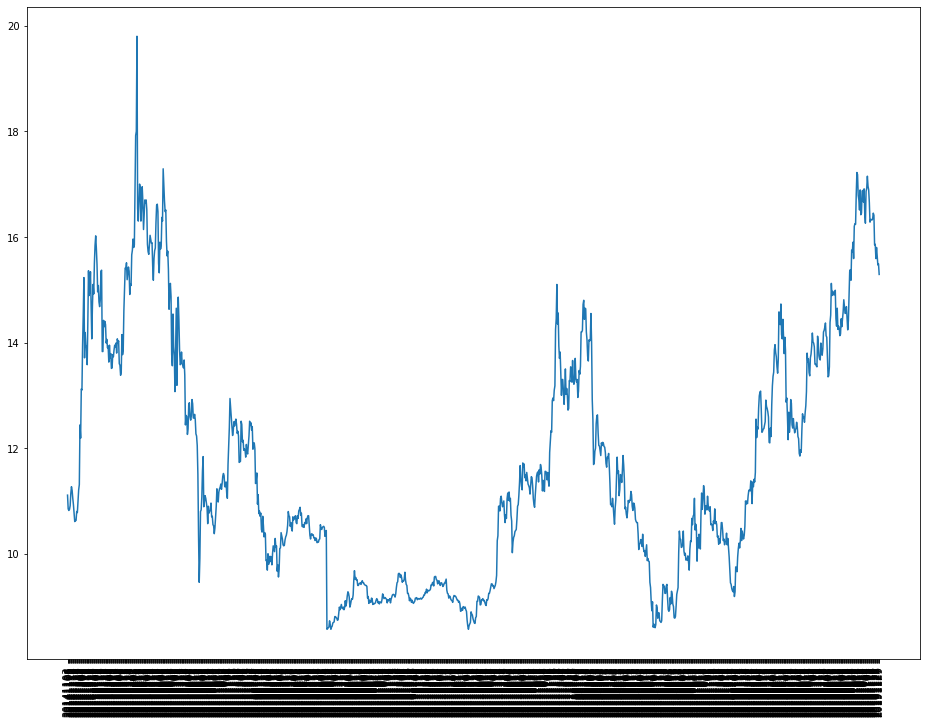

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,12))
plt.xticks( rotation='vertical')
plt.plot(df['trade_date'],df['close'])
plt.show()

In [68]:
total_df = pro.daily(trade_date='20190902', start_date='20150901', end_date='20191130')

In [64]:
EFT500_df = pro.daily(ts_code='510500', start_date='20150901', end_date='20191130')

In [75]:
total_df[total_df['ts_code'].str.contains('ETF')]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount


In [77]:
total_df.count()

ts_code       3661
trade_date    3661
open          3661
high          3661
low           3661
close         3661
pre_close     3661
change        3661
pct_chg       3661
vol           3661
amount        3661
dtype: int64

In [ ]:
## 导入garch模型包

In [24]:
import arch

## arch模拟

In [120]:
arch_model=arch.arch_model(y=df2['pct_chg'],mean='Constant',lags=0,vol='ARCH',p=1,q=0,dist='normal')
arch_model_result=arch_model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1479.0269444618211
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1479.0194791229242
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1479.001320933991
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1478.997118967272
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1478.9969958603583
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1478.996990995088
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1478.9969909950842
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6


In [125]:
arch_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                pct_chg   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1479.00
Distribution:                  Normal   AIC:                           2963.99
Method:            Maximum Likelihood   BIC:                           2977.69
                                        No. Observations:                  709
Date:                Sun, Dec 01 2019   Df Residuals:                      706
Time:                        11:34:02   Df Model:                            3
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1028  6.997e-02      1.469      0.142 [-3.434e-02,  0.240]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.4968      0.363      9.628  6.063e-22    [  2.785,  4.209]
alpha[1]       0.0905  7.870e-02      1.150      0.250 [-6.378e-02,  0.245]
===========================================================================

Covariance estimator: robust
"""

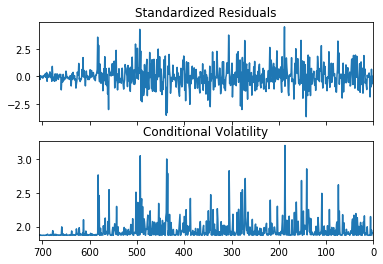

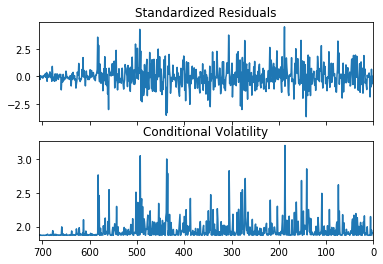

In [126]:
arch_model_result.plot()

## 结果方程 3.4594+0.2505*μ**2

## garch模拟

In [105]:
garch_model=arch.arch_model(y=df2['pct_chg'],mean='Constant',lags=0,vol='GARCH',p=1,q=1,dist='normal')
garch_result=garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1436.5923874731407
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1436.537524624583
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1435.357739000226
Iteration:      4,   Func. Count:     28,   Neg. LLF: 1434.170022371
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1434.1582815599627
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1432.9577348672192
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1432.8481424018016
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1431.6604302402982
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1430.488973965811
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1430.3905103475952
Iteration:     11,   Func. Count:     82,   Neg. LLF: 1429.2519934193438
Iteration:     12,   Func. Count:     89,   Neg. LLF: 1428.1665594565638
Iteration:     13,   Func. Count:     98,   Neg. LLF: 1428.0793430110618
Iteration:     14,   Func. Count:    105,   Neg. LLF: 1427

In [106]:
garch_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                pct_chg   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1422.90
Distribution:                  Normal   AIC:                           2853.80
Method:            Maximum Likelihood   BIC:                           2872.05
                                        No. Observations:                  709
Date:                Sun, Dec 01 2019   Df Residuals:                      705
Time:                        11:27:50   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0855  5.398e-02      1.584      0.113 [-2.030e-02,  0.191]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0161  9.213e-03      1.743  8.137e-02 [-2.001e-03,3.411e-02]
alpha[1]       0.0172  1.356e-02      1.268      0.205 [-9.384e-03,4.376e-02]
beta[1]        0.9805  1.154e-02     84.980      0.000      [  0.958,  1.003]
=============================================================================

Covariance estimator: robust
"""

## 结果方程 0.0117+0.0496*μ**2+0.9489*Sigma(n-1)

In [ ]:
#长期波动率
#sqrt(Vl)=sqrt(0.0117/(1-0.0496-0.9489))

In [110]:
garch_result.params[1]

0.01605538414242932

In [91]:
import math

In [111]:
vl=math.sqrt(garch_result.params[1]/(1-garch_result.params[2]-garch_result.params[3]))

In [112]:
print('vl:',vl)

vl: 2.6455590673579454


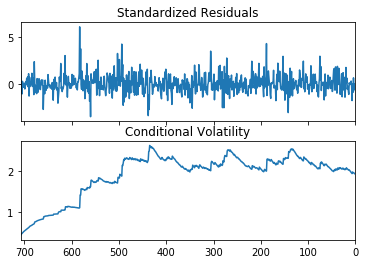

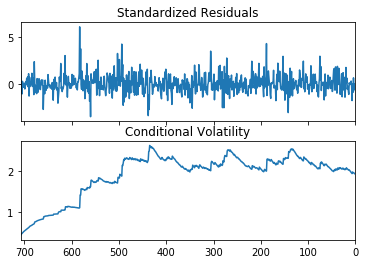

In [115]:
garch_result.plot()

In [129]:
pro.get_zz500s()

Exception: 接口不存在get_zz500s